# Interoperability with Xarray: Geotiff to Netcdf 

[ Christina's note - add hyperlinks to each Github for each file type or project ]

Xarray supports direct serialization and I/O to several file formats including pickle, netCDF, OPeNDAP (read-only), GRIB1/2 (read-only), and HDF by integrating with third-party libraries. Additional serialization formats for 1-dimensional data are available through pandas.

File types
- Pickle
- NetCDF 3/4
- RasterIO
- Zarr
- PyNio

Interoperability
- Pandas
- Iris
- CDMS
- dask DataFrame

### Tutorial Duration
10 minutes

### More Xarray Resources

Xarray I/O Documentation: http://xarray.pydata.org/en/latest/io.html

### Import libraries

In [1]:
%matplotlib inline

import glob
import pandas as pd
import xarray as xr
import os

###  Function for creating pandas DatetimeIndex for your raster files
This function reads the time stamp in the Geotiff file name formatted by VAR_YYYYMM_location.tif (e.g. AET_198010_ok.tif)

In [14]:
def readfiletime(flist):
    datetimecollect=[]
    for eachfile in flist:
        obj=os.path.basename(eachfile).split('_')[1]
        datetimecollect.append(pd.datetime.strptime(obj,'%Y%m').strftime('%Y-%m-%d'))
    return(pd.DatetimeIndex(datetimecollect))


### Loading all your raster files 

In [3]:
os.chdir('../data')
os.getcwd()

'/home/jovyan/work/Github/Xarray/data'

In [4]:
filenames = glob.glob('*.tif')
filenames
readfiletime(filenames)

DatetimeIndex(['1980-10-01', '1980-11-01', '1980-12-01', '1980-01-01',
               '1980-02-01', '1980-03-01', '1980-04-01', '1980-05-01',
               '1980-06-01', '1980-07-01', '1980-08-01', '1980-09-01'],
              dtype='datetime64[ns]', freq=None)

### Create time dimension for xarray dataset

In [5]:
time = xr.Variable('time', readfiletime(filenames))

### Define x, y dimension in xarray dataset

In [7]:
chunks = {'x': 5490, 'y': 5490, 'band': 1} # x: your data arrays # y: your data arrays

### Concat data arrays along time dimension 

In [8]:
da = xr.concat([xr.open_rasterio(f, chunks=chunks) for f in filenames], dim=time)

### Export xarray dataset to netCDF format

In [15]:
da.to_netcdf('AET_ok.nc')

## Interoperability

Xarray objects include exports methods that allow users to transform data from the Xarray data model to other data models such as Pandas, Iris, and CDMS. 

Below is a quick example of how to export a time series from a netdf to Pandas dataframe in order to 

**1) View a Table, 2) Plot a single time series, and 3) Export to csv.**

In [16]:
# select certain spatial subset to pandas dataframe
t_series = da.isel(x=200, y=200).to_pandas()
t_series.head()

band,1
time,
1980-10-01,25.946098
1980-11-01,19.905500
1980-12-01,17.784698
1980-01-01,10.608400
1980-02-01,8.540501


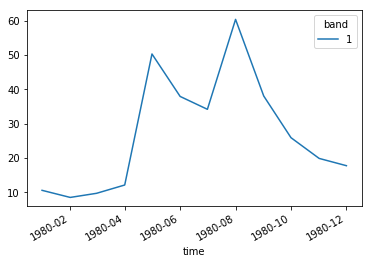

In [18]:
t_series.plot()

In [17]:
# export pandas dataframe to csv format
t_series.to_csv('AET_ok.csv')